Задание
Вопросы по заданию
В этом разделе можно задать вопросы и получить ответ.
Преподаватель: Даниил Корбут, Наталья Баданина, Александр Миленькин
См. материалы к занятию.
Для выполнения домашнего задания необходимо взять файл boston house-prices datase (sklearn.datasets.load_boston) и построить модель.
По аналогии задания к лекции «Классификация: Логистическая регрессия и SVM».
А именно построить модель регрессии, дерево решений, оптимизировать параметры и сравнить результаты.


In [1]:
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
import pandas as pd
data = pd.read_csv(load_boston()['filename'], skiprows=1)

# print(load_boston()['DESCR'])


In [2]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# строим линейную регресию

In [4]:
def get_score(X,y, random_seed=42, model=None):
  if model is None:
    model = LinearRegression()
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed )  
  model.fit(X_train, y_train)
  return model.score(X_test, y_test)

In [5]:
X = data.iloc[:, 0:13]
y = data[['MEDV']]

In [6]:
get_score(X, y)

0.711226005748492

In [7]:
# Модель дерево

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [18]:
clf = DecisionTreeRegressor(max_depth=2)

In [21]:
# X = data.iloc[:, 0:13]                              
y = data['MEDV']

X = data[data.columns[0:13]]

In [22]:
clf.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [24]:
clf.score(X, y)

0.6955744779730269

In [25]:
clf = DecisionTreeRegressor(max_depth=10)
y = data['MEDV']

X = data[data.columns[0:13]]
clf.fit(X, y)
clf.score(X, y)

0.9904768952758077

In [ ]:
# Наблюдается переобучение, точность предсказания 0,99

In [42]:
clf = DecisionTreeRegressor(max_depth=50, min_samples_split = 10, min_samples_leaf = 30 )
y = data['MEDV']

X = data[data.columns[0:13]]
clf.fit(X, y)
clf.score(X, y)

0.794087688199019

([<matplotlib.axis.YTick at 0x1e1b4b4afd0>,
 [Text(0, 0, 'CRIM'),
  Text(0, 1, 'ZN'),
  Text(0, 2, 'INDUS'),
  Text(0, 3, 'CHAS'),
  Text(0, 4, 'NOX'),
  Text(0, 5, 'RM'),
  Text(0, 6, 'AGE'),
  Text(0, 7, 'DIS'),
  Text(0, 8, 'RAD'),
  Text(0, 9, 'TAX'),
  Text(0, 10, 'PTRATIO'),
  Text(0, 11, 'B'),
  Text(0, 12, 'LSTAT')])

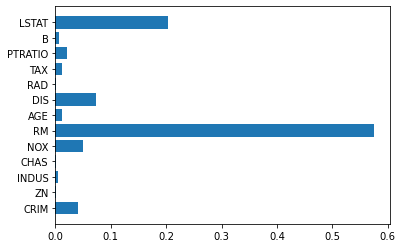

In [49]:
plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)



Наиболее важными фичами для модели оказались следующие: LSTAT (доля людей более низкого класса), 
    RM (количество комнат) и  DIS (взвешенные расстояния до пяти бостонских центров занятости )